### Vaibhav Kumar
### RollNo 19


### Naive Bayes Classification 


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.model_selection import train_test_split
import warnings 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [2]:
df=pd.read_csv("D:\\vk\\TRIM 3\\ML\\DATASET\\glass.data",sep=",")

In [3]:
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [4]:
col_names=["Id","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type of glass"]

In [5]:
df.columns=col_names

In [6]:
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [7]:
#create a naive bayes obj
nb=BernoulliNB()
gnb=GaussianNB()
mnb=MultinomialNB()

In [8]:
x=df.drop(columns=['Type of glass'])
y=df['Type of glass']

In [9]:
x

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00


In [10]:
y

0      1
1      1
2      1
3      1
4      1
      ..
208    7
209    7
210    7
211    7
212    7
Name: Type of glass, Length: 213, dtype: int64

In [11]:
df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [12]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [13]:

df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             213 non-null    int64  
 1   RI             213 non-null    float64
 2   Na             213 non-null    float64
 3   Mg             213 non-null    float64
 4   Al             213 non-null    float64
 5   Si             213 non-null    float64
 6   K              213 non-null    float64
 7   Ca             213 non-null    float64
 8   Ba             213 non-null    float64
 9   Fe             213 non-null    float64
 10  Type of glass  213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


<AxesSubplot:>

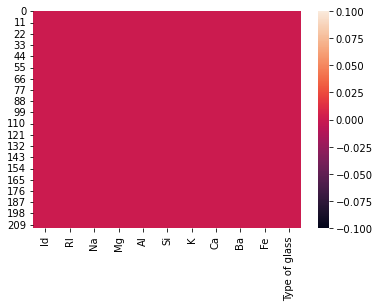

In [14]:
sns.heatmap(df.isnull())

**NO NULL VALUES**

In [15]:
#split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)


In [16]:
nb.fit(x_train,y_train)
gnb.fit(x_train,y_train)
mnb.fit(x_train,y_train)

MultinomialNB()

In [17]:
y_pred=nb.predict(x_test)
y_predg=gnb.predict(x_test)
y_predm=mnb.predict(x_test)

In [18]:
print(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_predg))
print(accuracy_score(y_test,y_predm))


0.4883720930232558
0.8604651162790697
0.7906976744186046


**Gaussian has most accuracy**

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.39      0.92      0.55        13
           2       0.67      0.11      0.19        18
           5       0.00      0.00      0.00         4
           6       0.50      1.00      0.67         1
           7       0.86      0.86      0.86         7

    accuracy                           0.49        43
   macro avg       0.48      0.58      0.45        43
weighted avg       0.55      0.49      0.40        43



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
print(classification_report(y_test,y_predg))

              precision    recall  f1-score   support

           1       0.87      1.00      0.93        13
           2       0.88      0.83      0.86        18
           5       1.00      0.25      0.40         4
           6       1.00      1.00      1.00         1
           7       0.78      1.00      0.88         7

    accuracy                           0.86        43
   macro avg       0.91      0.82      0.81        43
weighted avg       0.87      0.86      0.84        43



In [21]:
print(classification_report(y_test,y_predm))

              precision    recall  f1-score   support

           1       1.00      0.85      0.92        13
           2       0.88      0.83      0.86        18
           3       0.00      0.00      0.00         0
           5       1.00      0.25      0.40         4
           6       0.00      0.00      0.00         1
           7       0.78      1.00      0.88         7

    accuracy                           0.79        43
   macro avg       0.61      0.49      0.51        43
weighted avg       0.89      0.79      0.82        43



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall 

<AxesSubplot:>

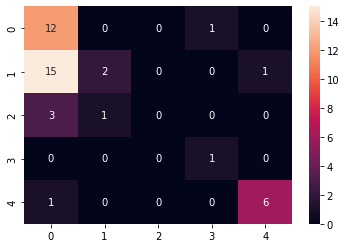

In [22]:
cv1=confusion_matrix(y_test,y_pred)
cv1
sns.heatmap(cv1,annot=True)

<AxesSubplot:>

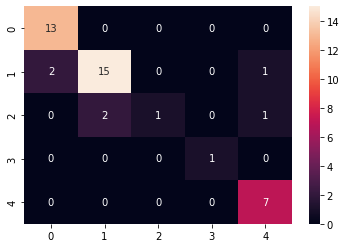

In [23]:
cv2=confusion_matrix(y_test,y_predg)
cv2
sns.heatmap(cv2,annot=True)

<AxesSubplot:>

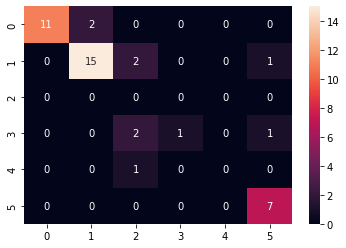

In [24]:
cv3=confusion_matrix(y_test,y_predm)
cv3
sns.heatmap(cv3,annot=True)